### Importamos librerias

In [2]:
import pandas as pd
import re
import xml.etree.ElementTree as ET
import seaborn as sns
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
# Natural Language Processing Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag  ## pos = Parts of Speech
 

In [3]:
## para ver el texto entero
pd.set_option("display.max_colwidth", None)

### Leemos el dataset

In [4]:
## importo el corpus de los textos positivos que me servirá para entrenar el modelo
df_p = pd.read_csv('../data/raw/tweets_pos_clean.txt', sep='\t', names = ['text'], index_col = None)
df_p

,text
0,Se imaginan a los chicos agradeciendo por el premio con cara de orgullo?.Que bonito :).#MTVHottest One Direction
1,"Eclesiastes4:9-12 ♡ Siempre, promesa :) https://t.co/XbrYsqa43T"
2,"@pedroj_ramirez Qué saborío, PJ. ya no compartes ni un gintonic con nosotros. :)"
3,Buenos dias para todos. Feliz inicio de semana. :-) http://t.co/svMgEcaxLr
4,"@pepedom @bquintero Gracias! No es así, deja claro que es el 100% de aquí http://t.co/cD3VFu7hnH }:)"
...,...
55051,Acá cocinandole a mi Hno :)
55052,"@nyazfthes Gracias por seguirme, en breve te devuelvo follow :) #TuitUtil http://t.co/7vreqrC98c"
55053,Y ahora no podré dormir :)))))))
55054,En la Boca :) @ Estadio Boca Juniors https://t.co/8QdsCv4KnB


In [5]:
## me quedo con 50000 registros
df_p_50 = df_p.iloc[:50000]
df_p_50

,text
0,Se imaginan a los chicos agradeciendo por el premio con cara de orgullo?.Que bonito :).#MTVHottest One Direction
1,"Eclesiastes4:9-12 ♡ Siempre, promesa :) https://t.co/XbrYsqa43T"
2,"@pedroj_ramirez Qué saborío, PJ. ya no compartes ni un gintonic con nosotros. :)"
3,Buenos dias para todos. Feliz inicio de semana. :-) http://t.co/svMgEcaxLr
4,"@pepedom @bquintero Gracias! No es así, deja claro que es el 100% de aquí http://t.co/cD3VFu7hnH }:)"
...,...
49995,Gran nit avui :)!! Estos remates destiu ms mtaraaan ajajaja
49996,"Mañana tempranito al gym, y despues a buscar mi paleta de paddle, hace banda no juego ese hermoso deporte ya quiero qe sea miercoles :)"
49997,"@nahuacrich Te aguanto porque te quiero! Ya paso todo, te amo y se sigue para adelante mi negrito :)"
49998,Los días pasan Y sigo odiando la puta exclusividad De Play Con @CallofDuty Vaya mierda :( Quiero La Maldita Beta En Xbox :D Viva Bo3 :)


In [462]:
## guardo el archivo con "solo" los 50000 registros
df_p_50.to_csv('../data/processed/tweets_pos_clean_50M.txt', index= False)

In [463]:
## lo abro para comprobarlo
df_p_50 = pd.read_csv("../data/processed/tweets_pos_clean_50M.txt")
df_p_50

,text
0,Se imaginan a los chicos agradeciendo por el premio con cara de orgullo?.Que bonito :).#MTVHottest One Direction
1,"Eclesiastes4:9-12 ♡ Siempre, promesa :) https://t.co/XbrYsqa43T"
2,"@pedroj_ramirez Qué saborío, PJ. ya no compartes ni un gintonic con nosotros. :)"
3,Buenos dias para todos. Feliz inicio de semana. :-) http://t.co/svMgEcaxLr
4,"@pepedom @bquintero Gracias! No es así, deja claro que es el 100% de aquí http://t.co/cD3VFu7hnH }:)"
...,...
49995,Gran nit avui :)!! Estos remates destiu ms mtaraaan ajajaja
49996,"Mañana tempranito al gym, y despues a buscar mi paleta de paddle, hace banda no juego ese hermoso deporte ya quiero qe sea miercoles :)"
49997,"@nahuacrich Te aguanto porque te quiero! Ya paso todo, te amo y se sigue para adelante mi negrito :)"
49998,Los días pasan Y sigo odiando la puta exclusividad De Play Con @CallofDuty Vaya mierda :( Quiero La Maldita Beta En Xbox :D Viva Bo3 :)


In [464]:
## añado columna para indicar que son textos positivos (le asigno un 1)
df_p_50["sensitive"] = '1'
df_p_50

,text,sensitive
0,Se imaginan a los chicos agradeciendo por el premio con cara de orgullo?.Que bonito :).#MTVHottest One Direction,1
1,"Eclesiastes4:9-12 ♡ Siempre, promesa :) https://t.co/XbrYsqa43T",1
2,"@pedroj_ramirez Qué saborío, PJ. ya no compartes ni un gintonic con nosotros. :)",1
3,Buenos dias para todos. Feliz inicio de semana. :-) http://t.co/svMgEcaxLr,1
4,"@pepedom @bquintero Gracias! No es así, deja claro que es el 100% de aquí http://t.co/cD3VFu7hnH }:)",1
...,...,...
49995,Gran nit avui :)!! Estos remates destiu ms mtaraaan ajajaja,1
49996,"Mañana tempranito al gym, y despues a buscar mi paleta de paddle, hace banda no juego ese hermoso deporte ya quiero qe sea miercoles :)",1
49997,"@nahuacrich Te aguanto porque te quiero! Ya paso todo, te amo y se sigue para adelante mi negrito :)",1
49998,Los días pasan Y sigo odiando la puta exclusividad De Play Con @CallofDuty Vaya mierda :( Quiero La Maldita Beta En Xbox :D Viva Bo3 :),1


In [465]:
## importo el corpus de los textos negativos que me servirá para entrenar el modelo
df_n = pd.read_csv('../data/raw/tweets_neg_clean.txt', sep='\t', names = ['text'])
df_n


,text
0,Cordobés porque me la complicaste con el coseno :(
1,Tengo fiebre :(
2,@sooooyderiver dame bola :(
3,Quiero bailar salsa :(
4,Metal Gear. :(
...,...
120943,Pero... Dime que no te perderé del todo :( ❤💛💚
120944,"Yo creo que a Colocolo le hacía falta un partido así, mas presión, aunque las lesiones fueron fuera de lugar oh que rabia :("
120945,@seru15 son para niño :( quisiera quedarmelos.
120946,Diganle al sonidero que ya le baje a su desmadre :(


In [466]:
## me quedo con 50000 registros
df_n_50 = df_n.iloc[:50000]
df_n_50

,text
0,Cordobés porque me la complicaste con el coseno :(
1,Tengo fiebre :(
2,@sooooyderiver dame bola :(
3,Quiero bailar salsa :(
4,Metal Gear. :(
...,...
49995,No hablas de mi verdad ?? :( https://t.co/tNumahwqws
49996,@Luli_Alvarez1 Es lo peor que te puede pasar :(
49997,domingo de pelis &lt;3 #eliminados &lt;3 quien quiere venir a verla con migo :(
49998,"El que busca donde no debe, se entera de lo que no quiere.... :("


In [467]:
## guardo el archivo con "solo" los 50000 registros
df_n_50.to_csv('../data/processed/tweets_neg_clean_50M.txt', index= False)

In [468]:
## lo abro para comprobarlo
df_n_50 = pd.read_csv("../data/processed/tweets_neg_clean_50M.txt")
df_n_50

,text
0,Cordobés porque me la complicaste con el coseno :(
1,Tengo fiebre :(
2,@sooooyderiver dame bola :(
3,Quiero bailar salsa :(
4,Metal Gear. :(
...,...
49995,No hablas de mi verdad ?? :( https://t.co/tNumahwqws
49996,@Luli_Alvarez1 Es lo peor que te puede pasar :(
49997,domingo de pelis &lt;3 #eliminados &lt;3 quien quiere venir a verla con migo :(
49998,"El que busca donde no debe, se entera de lo que no quiere.... :("


In [469]:
## añado columna para indicar que son textos negativos (le asigno un 0)
df_n_50["sensitive"] = '0'
df_n_50

,text,sensitive
0,Cordobés porque me la complicaste con el coseno :(,0
1,Tengo fiebre :(,0
2,@sooooyderiver dame bola :(,0
3,Quiero bailar salsa :(,0
4,Metal Gear. :(,0
...,...,...
49995,No hablas de mi verdad ?? :( https://t.co/tNumahwqws,0
49996,@Luli_Alvarez1 Es lo peor que te puede pasar :(,0
49997,domingo de pelis &lt;3 #eliminados &lt;3 quien quiere venir a verla con migo :(,0
49998,"El que busca donde no debe, se entera de lo que no quiere.... :(",0


In [470]:
## mergeo los 2 df
df = pd.merge(df_n_50, df_p_50, how = "outer")
df

,text,sensitive
0,Cordobés porque me la complicaste con el coseno :(,0
1,Tengo fiebre :(,0
2,@sooooyderiver dame bola :(,0
3,Quiero bailar salsa :(,0
4,Metal Gear. :(,0
...,...,...
99995,Gran nit avui :)!! Estos remates destiu ms mtaraaan ajajaja,1
99996,"Mañana tempranito al gym, y despues a buscar mi paleta de paddle, hace banda no juego ese hermoso deporte ya quiero qe sea miercoles :)",1
99997,"@nahuacrich Te aguanto porque te quiero! Ya paso todo, te amo y se sigue para adelante mi negrito :)",1
99998,Los días pasan Y sigo odiando la puta exclusividad De Play Con @CallofDuty Vaya mierda :( Quiero La Maldita Beta En Xbox :D Viva Bo3 :),1


In [471]:
## barajo el df para mezclar los tweets positivos y negativos
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,text,sensitive
0,Es ahora donde digo Mariano andate es mejor q estes afuera antes q estos hdp sigan diciendo barbaridades quien mierda se creen que son :(,0
1,Que maaal :( no me discriminen x feaa jajaja https://t.co/HgKOmjfqsO,0
2,@rochi_ig Feliz cumple Rochi! Besos desde Italia! :),1
3,Hola cara de bola :3 okay no :( #MTVHottest Justin Bieber,0
4,Gente sexy!! Siganme en @EvereverOficial por fa. :),1


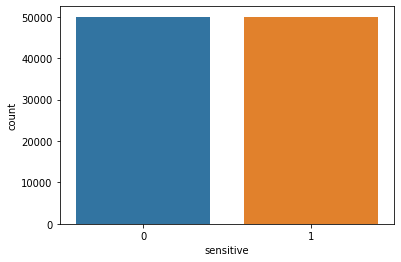

In [472]:
## compruebo que tenemos exactamente el mismo valor de polaridad para cada tipo (así el modelo tiene el mismo número de registros positivos y negativos, y evitamos sesgos)
sns.countplot(x = 'sensitive', data=df);

In [473]:
## guardo el dataset sin limpiar aún (con el texto íntegro) y con los registros negativos y positivos juntos
df.to_csv('../data/processed/texto_original_POS_NEG.txt', index= False)

## 2. Limpieza de datos

In [474]:
## visualizo la columna de los textos
df['text']

0         Es ahora donde digo Mariano andate es mejor q estes afuera antes q estos hdp sigan diciendo barbaridades quien mierda se creen que son :(
1                                                                              Que maaal :( no me discriminen x feaa jajaja https://t.co/HgKOmjfqsO
2                                                                                              @rochi_ig Feliz cumple Rochi! Besos desde Italia! :)
3                                                                                         Hola cara de bola :3 okay no :( #MTVHottest Justin Bieber
4                                                                                               Gente sexy!! Siganme en @EvereverOficial por fa. :)
                                                                            ...                                                                    
99995                                                                       @AylennVillalbaa JAJJAJJA es que son

#### Eliminamos signos de puntuación, links y stopwords

In [475]:
## elimino los SIGNOS DE PUNTUACIÓN 
## limpio los tweets de todos los signos de puntuación y pasamos todo a minúsculas
import re

signos = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\#)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\{)|(\})|(\d+)")

def signs_tweets(tweet):
    return signos.sub('', tweet.lower())

df['text'] = df['text'].apply(signs_tweets)
df['text'].head()

0    es ahora donde digo mariano andate es mejor q estes afuera antes q estos hdp sigan diciendo barbaridades quien mierda se creen que son 
1                                                                           que maaal  no me discriminen x feaa jajaja https//tco/hgkomjfqso
2                                                                                            rochi_ig feliz cumple rochi besos desde italia 
3                                                                                       hola cara de bola  okay no  mtvhottest justin bieber
4                                                                                              gente sexy siganme en evereveroficial por fa 
Name: text, dtype: object

In [476]:
## corrijo las abreviaciones
def fix_abbr(tweet):
    
    '''Corrige abreviaciones'''

    if type(tweet) == list:
        words = tweet
    elif type(tweet) == str:
        words = tweet.split()
    else:
        raise TypeError('debe ser list o str')

    abbrevs = {'d': 'de',
               'x': 'por',
               'xa': 'para',
               'as': 'has',
               'q': 'que',
               'k': 'que',
               'dl': 'del',
               'xq': 'porqué',
               'dr': 'doctor',
               'dra': 'doctora',
               'sr': 'señor',
               'sra': 'señora',
               'm': 'me'}
               
    return " ".join([abbrevs[word] if word in abbrevs.keys() else word for word in words])

In [477]:
df['text'] = df['text'].apply(fix_abbr)

df.head()

,text,sensitive
0,es ahora donde digo mariano andate es mejor que estes afuera antes que estos hdp sigan diciendo barbaridades quien mierda se creen que son,0
1,que maaal no me discriminen por feaa jajaja https//tco/hgkomjfqso,0
2,rochi_ig feliz cumple rochi besos desde italia,1
3,hola cara de bola okay no mtvhottest justin bieber,0
4,gente sexy siganme en evereveroficial por fa,1


In [478]:
## elimino los LINKS de los tweets 

def remove_links(df):
    return " ".join(['{link}' if ('http') in word else word for word in df.split()])

df['text'] = df['text'].apply(remove_links)

df.head()


,text,sensitive
0,es ahora donde digo mariano andate es mejor que estes afuera antes que estos hdp sigan diciendo barbaridades quien mierda se creen que son,0
1,que maaal no me discriminen por feaa jajaja {link},0
2,rochi_ig feliz cumple rochi besos desde italia,1
3,hola cara de bola okay no mtvhottest justin bieber,0
4,gente sexy siganme en evereveroficial por fa,1


In [479]:
# elimino las STOPWORDS
from nltk.corpus import stopwords

spanish_stopwords = stopwords.words('spanish')
user_stop_words = ['RT','rt', 'un', 'uno', 'a', 'da', 'al', 'una', 'o', 'el', 'le',
                    'lo', 'los', '...', '..', '.', '.....', '....', '......','.......','que', 'es', '@']

stop_words = spanish_stopwords + user_stop_words

def remove_stopwords(df):
    return " ".join([word for word in df.split() if word not in stop_words])

In [480]:
df['text'] = df['text'].apply(remove_stopwords)
df.head()

,text,sensitive
0,ahora digo mariano andate mejor estes afuera hdp sigan diciendo barbaridades mierda creen,0
1,maaal discriminen feaa jajaja {link},0
2,rochi_ig feliz cumple rochi besos italia,1
3,hola cara bola okay mtvhottest justin bieber,0
4,gente sexy siganme evereveroficial fa,1


In [481]:
## elimino las vocales repetidas 
def remove_repeated_vocals(data):
    
    '''Elimina vocales repetidas'''

    list_new_word = []

    for word in data.split(): #separa en palabras
        new_word = []
        pos = 0
        
        for letra in word: #separa cada palabra en letras

            #print(word, letra, pos, '-', new_word)

            if pos>0:
                if letra in ('a', 'e', 'i', 'o', 'u') and letra == new_word[pos-1]:
                    None
                else:
                    new_word.append(letra)
                    pos +=1
            else:
                new_word.append(letra)
            
                pos += 1
        else:
            list_new_word.append("".join(new_word))
                
    return " ".join(list_new_word)

In [483]:
## normalizo las risas
def normalize_laughts(data):
    
    '''Normaliza risas'''
    
    list_new_words = []
    for word in data.split(): #separo en palabras
        count = 0
        vocals_dicc = {'a': 0, 'e': 0, 'i': 0, 'o':0, 'u':0}
        
        for letra in word:
            if letra == 'j':
                count+=1
            if letra in vocals_dicc.keys():
                vocals_dicc[letra] += 1
        else:
            if count>3:
                dicc_risa = {'a': 'jaja', 'e': 'jeje', 'i': 'jiji', 'o': 'jojo', 'u': 'juju'}
                risa_type = max(vocals_dicc, key= lambda x: vocals_dicc[x]) #Indica si es a,e,i,o,u
                list_new_words.append(dicc_risa[risa_type])
            else:
                list_new_words.append(word)
    
    return " ".join(list_new_words)

In [485]:
## guardo el dataset limpio y con registros negativos y positivos
df.to_csv('../data/processed/texto_limpio_POS_NEG.txt', index= False)

#### Stemmer  - aunque esté puesto aquí abajo, finalmente NO lo usamos, ya que hemos visto que, usándolo, las predicciones no funcionaban bien.
Por lo tanto se quedará comentado

In [418]:
# from nltk.stem.snowball import SnowballStemmer

# def spanish_stemmer(x):
#     stemmer = SnowballStemmer('spanish')
#     return " ".join([stemmer.stem(word) for word in x.split()])

# df['text'] = df['text'].apply(spanish_stemmer)
# df['text'].head()

#### Vectorizamos el dataset

In [486]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

#### Montamos Pipeline
Modelos que suelen funcionar bien con pocas observaciones y muchas features son la Regresión logística el LinearSVC o Naive Bayes.

In [487]:
# Creamos X,y

X = df['text']
y = df.replace({'sensitive': {'N': 0, 'P': 1}})['sensitive']

# Creamos train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    test_size = 0.15)

In [488]:
pipeline = Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=10,
                                 ngram_range=(1, 3))),
                ('cls', LinearSVC(C=0.2, max_iter=1500))])



#### Entrenamos

In [489]:

pipeline.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=10,
                                 ngram_range=(1, 3))),
                ('cls', LinearSVC(C=0.2, max_iter=1500))])

In [490]:
predictions = pipeline.predict(X_test)

In [491]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracy

0.7338666666666667

#### Guardamos el modelo

In [492]:

import pickle

with open('../API_twitter/finished.model', "wb") as archivo_salida:
    pickle.dump(pipeline, archivo_salida)

## 4. Predicciones
Realizar una predicción con un tweet que escojas

In [493]:
with open('../API_twitter/finished.model', "rb") as archivo_entrada:
    pipeline_importada = pickle.load(archivo_entrada)

In [494]:
pipeline_importada

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=10,
                                 ngram_range=(1, 3))),
                ('cls', LinearSVC(C=0.2, max_iter=1500))])

#### Leemos el pipeline con el modelo

In [690]:

df = pd.read_csv('../API_twitter/tweets_ver.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   text             100 non-null    object
 1   created_at       100 non-null    object
 2   retweet_count    100 non-null    int64 
 3   username         100 non-null    object
 4   followers_count  100 non-null    int64 
 5   verified         100 non-null    bool  
dtypes: bool(1), int64(2), object(3)
memory usage: 4.1+ KB


In [691]:

text = np.array(df['text']).reshape(-1,)
test_clean = pd.DataFrame(text, columns=['content'])

# Signos de puntuacion
test_clean['content_clean'] = test_clean['content'].apply(signs_tweets)

# Corregimos abreviaciones
test_clean['content_clean'] = test_clean['content_clean'].apply(fix_abbr)

# Eliminamos links
test_clean['content_clean'] = test_clean['content_clean'].apply(remove_links)

# Eliminamos stopwords
test_clean['content_clean'] = test_clean['content_clean'].apply(remove_stopwords)

# Eliminamos vocales repetidas
test_clean['content_clean'] = test_clean['content_clean'].apply(remove_repeated_vocals)

# Normalizamos las risas
test_clean['content_clean'] = test_clean['content_clean'].apply(normalize_laughts)


# Aplicamos el Stemmer  -- NO lo aplicamos
# test_clean['content_clean'] = test_clean['content_clean'].apply(spanish_stemmer)


pd.set_option('display.max_colwidth', None)



predictions = pipeline_importada.predict(test_clean['content_clean'])
test_clean['polarity'] = pd.Series(predictions)
test_clean

,content,content_clean,polarity
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,luisgyg ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positiv…,0
1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",anabel gusto iphone pa grabar videos gusta mas fotos s ultra ahora celular samsung puedes grabar k🥺😍,1
2,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",hyyunmei k-stay típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…,0
3,"70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positivo a #COVID tras asistir al #CES2022 en Las Vegas, según @Reuters. La CTA, organizadora del CES, no pudo confirmar el número de positivos en el evento. https://t.co/IfbAhsgesN",ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positivo covid tras asistir ces vegas según reuters cta organizadora ces pudo confirmar número positivos evento {link},1
4,"@meinOddity si tiene Samsung te sale una app llamada game launcher, ahí deben de estar todos los juegos descargados que tengas, abajo del icon del juego aparace una opción llamada ""detalles"", y en esa te dice cuantas horas vas jugando cada juego",meinoddity si samsung sale app llamada game launcher ahí deben juegos descargados abajo icon juego aparace opción llamada detalles dice cuantas horas vas jugando cada juego,1
...,...,...,...
95,RT @SaraOdemiOdeck: Es poco probable que lo termine a si que lo comparto asi 😆 Mi primera ilustracion hecha completamente en mi samsung tab…,saraodemiodeck probable termine si comparto asi 😆 primera ilustracion hecha completamente samsung tab…,1
96,"@xJulio89x @ParamountPlusLA Pues yo tengo Samsung y no me aparece la aplicación, es de modelo reciente",xjuliox paramountplusla pues samsung aparece aplicación modelo reciente,0
97,Samsung anunció nuevas funciones y tecnología para los hogares en CES 2022 @SamsungArg https://t.co/F3mZlOWvrR,samsung anunció nuevas funciones tecnología hogares ces samsungarg {link},1
98,Hoy lo lograré.\n\nLo juro.\n\nLo que sea por twittear desde un SAMSUNG SmartDildo™ https://t.co/BmwYTFhrR3,hoy lograré juro twittear samsung smartdildo™ {link},1


In [692]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        100 non-null    object
 1   content_clean  100 non-null    object
 2   polarity       100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [706]:
# para obtener ADJETIVOS de los tweets  --> esto se usará mas abajo, donde los tweets negativos solamente
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
            # if tag == "JJ"]  # pos_tag module in NLTK library (POS = part of speech) relativo a adejtivos
            if tag == "NN"]   ## relativo a nombres
    return " ".join(tweet)  # join words with a space in between them


In [707]:

import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('cess_esp')
nltk.download('universal_tagset')

[nltk_data] Downloading package averaged_perceptron_tagger to C:\Users
[nltk_data]     \Silvia\AppData\Local\Programs\Python\Python37\nltk_da
[nltk_data]     ta...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package cess_esp to C:\Users\Silvia\AppData\Lo
[nltk_data]     cal\Programs\Python\Python37\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk_data] Downloading package universal_tagset to C:\Users\Silvia\Ap
[nltk_data]     pData\Local\Programs\Python\Python37\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [708]:
### esto de los adjective hay que aplicarselo al texto limpio, no al original, si no no tiene sentido

test_clean['Tweets_Adjectives'] = test_clean['content_clean'].apply(getAdjectives)
test_clean

,content,content_clean,polarity,Tweets_Adjectives
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,luisgyg ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positiv…,0,incluidos dieron positiv…
1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",anabel gusto iphone pa grabar videos gusta mas fotos s ultra ahora celular samsung puedes grabar k🥺😍,1,anabel gusto iphone pa grabar videos gusta mas fotos s samsung k🥺😍
2,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",hyyunmei k-stay típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…,0,típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…
3,"70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positivo a #COVID tras asistir al #CES2022 en Las Vegas, según @Reuters. La CTA, organizadora del CES, no pudo confirmar el número de positivos en el evento. https://t.co/IfbAhsgesN",ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positivo covid tras asistir ces vegas según reuters cta organizadora ces pudo confirmar número positivos evento {link},1,incluidos dieron positivo covid confirmar número positivos link
4,"@meinOddity si tiene Samsung te sale una app llamada game launcher, ahí deben de estar todos los juegos descargados que tengas, abajo del icon del juego aparace una opción llamada ""detalles"", y en esa te dice cuantas horas vas jugando cada juego",meinoddity si samsung sale app llamada game launcher ahí deben juegos descargados abajo icon juego aparace opción llamada detalles dice cuantas horas vas jugando cada juego,1,meinoddity si samsung sale game deben juegos descargados icon juego aparace jugando cada juego
...,...,...,...,...
95,RT @SaraOdemiOdeck: Es poco probable que lo termine a si que lo comparto asi 😆 Mi primera ilustracion hecha completamente en mi samsung tab…,saraodemiodeck probable termine si comparto asi 😆 primera ilustracion hecha completamente samsung tab…,1,saraodemiodeck termine si comparto asi primera ilustracion hecha completamente samsung tab…
96,"@xJulio89x @ParamountPlusLA Pues yo tengo Samsung y no me aparece la aplicación, es de modelo reciente",xjuliox paramountplusla pues samsung aparece aplicación modelo reciente,0,paramountplusla modelo reciente
97,Samsung anunció nuevas funciones y tecnología para los hogares en CES 2022 @SamsungArg https://t.co/F3mZlOWvrR,samsung anunció nuevas funciones tecnología hogares ces samsungarg {link},1,samsung anunció tecnología link
98,Hoy lo lograré.\n\nLo juro.\n\nLo que sea por twittear desde un SAMSUNG SmartDildo™ https://t.co/BmwYTFhrR3,hoy lograré juro twittear samsung smartdildo™ {link},1,hoy lograré juro samsung smartdildo™ link


In [709]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   content            100 non-null    object
 1   content_clean      100 non-null    object
 2   polarity           100 non-null    object
 3   Tweets_Adjectives  100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


Vamos a ver las palabras mas comunes del df. Juntaremos todos los ADEJTIVOS en un único texto y las sacaremos.
De momento lo hago con todo el df, y si veo que funciona lo haré solo con el dataframe con los tweets negativos

In [710]:
## 1. creamos un df final con las previsiones y los TWEETS (Y los adjetivos aun sin separar y contabilizar)
## el df "test_clean" contiene las predicciones: renombro la columna "content" a "text" para poder mergearlo luego con el df de los tweets

df_polarity = test_clean.rename(columns = {"content": "text", "content_clean": "text_clean"})  ## renombro
print(len(df_polarity))
df_polarity.head()  ## ya está listo para mergearlo con el df general


100


,text,text_clean,polarity,Tweets_Adjectives
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,luisgyg ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positiv…,0,incluidos dieron positiv…
1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",anabel gusto iphone pa grabar videos gusta mas fotos s ultra ahora celular samsung puedes grabar k🥺😍,1,anabel gusto iphone pa grabar videos gusta mas fotos s samsung k🥺😍
2,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",hyyunmei k-stay típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…,0,típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…
3,"70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positivo a #COVID tras asistir al #CES2022 en Las Vegas, según @Reuters. La CTA, organizadora del CES, no pudo confirmar el número de positivos en el evento. https://t.co/IfbAhsgesN",ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positivo covid tras asistir ces vegas según reuters cta organizadora ces pudo confirmar número positivos evento {link},1,incluidos dieron positivo covid confirmar número positivos link
4,"@meinOddity si tiene Samsung te sale una app llamada game launcher, ahí deben de estar todos los juegos descargados que tengas, abajo del icon del juego aparace una opción llamada ""detalles"", y en esa te dice cuantas horas vas jugando cada juego",meinoddity si samsung sale app llamada game launcher ahí deben juegos descargados abajo icon juego aparace opción llamada detalles dice cuantas horas vas jugando cada juego,1,meinoddity si samsung sale game deben juegos descargados icon juego aparace jugando cada juego


In [711]:
## creo columna temporal para poder mergear
df_polarity["temporal"] = np.arange(0, len(df_polarity))
df["temporal"] = np.arange(0, len(df))

In [712]:
df_polarity.head(4)

,text,text_clean,polarity,Tweets_Adjectives,temporal
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,luisgyg ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positiv…,0,incluidos dieron positiv…,0
1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",anabel gusto iphone pa grabar videos gusta mas fotos s ultra ahora celular samsung puedes grabar k🥺😍,1,anabel gusto iphone pa grabar videos gusta mas fotos s samsung k🥺😍,1
2,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",hyyunmei k-stay típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…,0,típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…,2
3,"70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positivo a #COVID tras asistir al #CES2022 en Las Vegas, según @Reuters. La CTA, organizadora del CES, no pudo confirmar el número de positivos en el evento. https://t.co/IfbAhsgesN",ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positivo covid tras asistir ces vegas según reuters cta organizadora ces pudo confirmar número positivos evento {link},1,incluidos dieron positivo covid confirmar número positivos link,3


In [713]:
df.head(4)

,text,created_at,retweet_count,username,followers_count,verified,temporal
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,2022-01-14 14:24:59+00:00,1,JoiaribElnatan,16056,False,0
1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",2022-01-14 14:24:35+00:00,0,LuisGyG,64264,True,1
2,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",2022-01-14 14:23:47+00:00,2,GiXnoxD,416,False,2
3,"70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positivo a #COVID tras asistir al #CES2022 en Las Vegas, según @Reuters. La CTA, organizadora del CES, no pudo confirmar el número de positivos en el evento. https://t.co/IfbAhsgesN",2022-01-14 14:22:48+00:00,1,anabel0944,180,False,3


In [714]:
## 2. mergeo y me quedo con un único df final
df_temp = pd.merge(df,df_polarity, how="outer", on="temporal")
df_temp = df_temp.drop("temporal", axis = 1)
df_temp.head(2)

### EN REALIDAD SE PODRIA BORRAR LA COLUMNA "Tweets_Adjectives" EN ESTE DF FINAL, YA QUE SOLO ME SIRVE LUEGO PARA LOS TWEETS NEGATIVOS

,text_x,created_at,retweet_count,username,followers_count,verified,text_y,text_clean,polarity,Tweets_Adjectives
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,2022-01-14 14:24:59+00:00,1,JoiaribElnatan,16056,False,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,luisgyg ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positiv…,0,incluidos dieron positiv…
1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",2022-01-14 14:24:35+00:00,0,LuisGyG,64264,True,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",anabel gusto iphone pa grabar videos gusta mas fotos s ultra ahora celular samsung puedes grabar k🥺😍,1,anabel gusto iphone pa grabar videos gusta mas fotos s samsung k🥺😍


In [715]:
## borro text_y y renombro text_x a simplemente text
df_temp = df_temp.drop("text_y", axis = 1)
df = df_temp.rename(columns = {"text_x" : "text"})
df.head(2)

,text,created_at,retweet_count,username,followers_count,verified,text_clean,polarity,Tweets_Adjectives
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,2022-01-14 14:24:59+00:00,1,JoiaribElnatan,16056,False,luisgyg ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positiv…,0,incluidos dieron positiv…
1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",2022-01-14 14:24:35+00:00,0,LuisGyG,64264,True,anabel gusto iphone pa grabar videos gusta mas fotos s ultra ahora celular samsung puedes grabar k🥺😍,1,anabel gusto iphone pa grabar videos gusta mas fotos s samsung k🥺😍


In [716]:
df.info()  ## no sé porqué el "polarity" es un object en vez que número, lo voy a pasar a "int" por si tuviera que dar algun fallo luego
            ## y me aseguro de que no haya NaNs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               100 non-null    object
 1   created_at         100 non-null    object
 2   retweet_count      100 non-null    int64 
 3   username           100 non-null    object
 4   followers_count    100 non-null    int64 
 5   verified           100 non-null    bool  
 6   text_clean         100 non-null    object
 7   polarity           100 non-null    object
 8   Tweets_Adjectives  100 non-null    object
dtypes: bool(1), int64(2), object(6)
memory usage: 7.1+ KB


In [717]:
df["polarity"] = df["polarity"].astype("int")

In [718]:

df_final = df.copy()  ## copio el dataframe entero, para borrarle la columna de los adjectives pero no jorobar el original
df_final.drop(["Tweets_Adjectives"], axis = 1, inplace= True)
df_final.drop(["text_clean"], axis = 1, inplace= True)  ## tambien borro el "text_clean", que solo me sirve para los adjectives
df_final = df_final[["polarity", "text", "created_at", "retweet_count", "username", "followers_count", "verified"]]
df_final.head(3)
# df_final.info()

,polarity,text,created_at,retweet_count,username,followers_count,verified
0,0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,2022-01-14 14:24:59+00:00,1,JoiaribElnatan,16056,False
1,1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",2022-01-14 14:24:35+00:00,0,LuisGyG,64264,True
2,0,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",2022-01-14 14:23:47+00:00,2,GiXnoxD,416,False


In [719]:
df.head(3)  ## efectivamente este df sigue manteniendo los adjectives, que me serviran luego para aislar los tweets negativos y sacar el conteo de adjetivos o palabras claves

,text,created_at,retweet_count,username,followers_count,verified,text_clean,polarity,Tweets_Adjectives
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,2022-01-14 14:24:59+00:00,1,JoiaribElnatan,16056,False,luisgyg ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positiv…,0,incluidos dieron positiv…
1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",2022-01-14 14:24:35+00:00,0,LuisGyG,64264,True,anabel gusto iphone pa grabar videos gusta mas fotos s ultra ahora celular samsung puedes grabar k🥺😍,1,anabel gusto iphone pa grabar videos gusta mas fotos s samsung k🥺😍
2,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",2022-01-14 14:23:47+00:00,2,GiXnoxD,416,False,hyyunmei k-stay típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…,0,típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…


In [720]:
## guardo el csv SIN los keywords y el texto limpiado, para meterlo en la API
df_final.to_csv("../API_twitter/tweets_ver_polarity.csv", index = False)


In [721]:
## cargo el csv para ver si se ha cargado bien, SI
df_final = pd.read_csv("../API_twitter/tweets_ver_polarity.csv")
df_final

,polarity,text,created_at,retweet_count,username,followers_count,verified
0,0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,2022-01-14 14:24:59+00:00,1,JoiaribElnatan,16056,False
1,1,"@anabel0944 Xa a mi gusto el iphone pa grabar videos en 4k, pero me gusta mas para fotos el s21 ultra ahora ese celular samsung puedes grabar 4k y 8k🥺😍",2022-01-14 14:24:35+00:00,0,LuisGyG,64264,True
2,0,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",2022-01-14 14:23:47+00:00,2,GiXnoxD,416,False
3,1,"70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positivo a #COVID tras asistir al #CES2022 en Las Vegas, según @Reuters. La CTA, organizadora del CES, no pudo confirmar el número de positivos en el evento. https://t.co/IfbAhsgesN",2022-01-14 14:22:48+00:00,1,anabel0944,180,False
4,1,"@meinOddity si tiene Samsung te sale una app llamada game launcher, ahí deben de estar todos los juegos descargados que tengas, abajo del icon del juego aparace una opción llamada ""detalles"", y en esa te dice cuantas horas vas jugando cada juego",2022-01-14 14:22:46+00:00,0,MarSt4y,16,False
...,...,...,...,...,...,...,...
95,1,RT @SaraOdemiOdeck: Es poco probable que lo termine a si que lo comparto asi 😆 Mi primera ilustracion hecha completamente en mi samsung tab…,2022-01-14 12:36:14+00:00,3,csnwz_,3248,False
96,0,"@xJulio89x @ParamountPlusLA Pues yo tengo Samsung y no me aparece la aplicación, es de modelo reciente",2022-01-14 12:34:00+00:00,0,m__casti,3647,False
97,1,Samsung anunció nuevas funciones y tecnología para los hogares en CES 2022 @SamsungArg https://t.co/F3mZlOWvrR,2022-01-14 12:33:10+00:00,0,botxboxseriesx,1568,False
98,1,Hoy lo lograré.\n\nLo juro.\n\nLo que sea por twittear desde un SAMSUNG SmartDildo™ https://t.co/BmwYTFhrR3,2022-01-14 12:33:01+00:00,0,chalioDMX,79,False


Ahora detecto los tweets negativos y me quedo SOLO con esos, para hacer el conteo de los adjetivos mas comunes

In [722]:
neg = df["polarity"] == 0 ## defino la máscara
neg

0      True
1     False
2      True
3     False
4     False
      ...  
95    False
96     True
97    False
98    False
99    False
Name: polarity, Length: 100, dtype: bool

In [723]:
df_negativos = df[neg]
print(len(df_negativos))  ## hay 34 valores negativos (y por consecuencia 66 positivos, en este df de 100 tweets)
df_negativos.head(3)

34


,text,created_at,retweet_count,username,followers_count,verified,text_clean,polarity,Tweets_Adjectives
0,RT @LuisGyG: 70 ciudadanos de Coreal del Sur (incluidos algunos representantes de Samsung y la fabricante de chips SK Hynix) dieron positiv…,2022-01-14 14:24:59+00:00,1,JoiaribElnatan,16056,False,luisgyg ciudadanos coreal sur incluidos representantes samsung fabricante chips sk hynix dieron positiv…,0,incluidos dieron positiv…
2,"RT @hyyunmei: K-Stay: las típicas primas milipilis que tiene todo iPhone, Gucci, todo re caro y le pasas un samsung o motorola y empieza a…",2022-01-14 14:23:47+00:00,2,GiXnoxD,416,False,hyyunmei k-stay típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…,0,típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a…
5,"@anabel0944 Xa si en verdad ta xeveron aunque el iohone 12 pro max duraba 16 horas prefiero 20 horas de bateria jaja si compraras samsung que sea entre el s21 ultra o note 20 ultra, si vas por huawei vaya por el mate 40 pro o el p40 pro son lo mejor en bateria y camara.😌",2022-01-14 14:22:26+00:00,0,hyyunmei,641,False,anabel si verdad ta xeveron aunque iohone pro max duraba horas prefiero horas bateria jaja si compraras samsung s ultra note ultra si vas huawei vaya mate pro p pro mejor bateria camara😌,0,anabel si verdad ta aunque iohone duraba note si vas huawei vaya bateria camara😌


In [724]:
## ESTO ES PARA SACAR LAS PALABRAS MAS COMUNES DE LOS TWEETS NEGATIVOS
# Extraer todos los adjetivos relativos a los tweets negativos en un único string donde cada palabra está dividida por un espacio
adj_unico_texto = df_negativos['Tweets_Adjectives'].tolist()
adj_unico_texto = " ".join(map(str, adj_unico_texto))
adj_unico_texto

'incluidos dieron positiv… típicas primas milipilis iphone gucci re caro pasas samsung motorola empieza a… anabel si verdad ta aunque iohone duraba note si vas huawei vaya bateria camara😌 samsungco momento renovar hogar electrométricos siempre quisiste sale samsung … segun escogí samsung silenciar aun así vibran molesto tener silenciar samsung año llévate tv samsung galaxy pc matebok además % d… entro ig samsung j querés pedazo trolx odio corrector samsung acá ganga comparado ej samsung si sumas valija viajar miami samsungarg pésimo servicio técnico premium desastre samsung mas medicenjuanin gusta kekofranc samsung gama alta 😆 liceocientifico premiados solve tomorrow samsung ele… jkaskjsakj colgué minutos llegué dijeron esperar vos muero samsung aumentaría tv hermano marca samsung pasado link jowifromdablock samsung gogle pixel comprarlo tienda andaba teléfono jorgduardojesus verolist mcfaby_l rocionahle alvaro_delgado paezvarela jaja samsung techint hoy bajo agua hablas van sacar crud

In [725]:
df_negativos.info()  ## para verificar si tengo valores nulos y, si así fuera, tendria que pasarle un dropna

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 0 to 96
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               34 non-null     object
 1   created_at         34 non-null     object
 2   retweet_count      34 non-null     int64 
 3   username           34 non-null     object
 4   followers_count    34 non-null     int64 
 5   verified           34 non-null     bool  
 6   text_clean         34 non-null     object
 7   polarity           34 non-null     int32 
 8   Tweets_Adjectives  34 non-null     object
dtypes: bool(1), int32(1), int64(2), object(5)
memory usage: 2.3+ KB


In [726]:
# df_negativos.dropna(inplace=True)
# df_negativos.info()

In [727]:
## AL METERLO EN UN UNICO TEXTO, YA NO TENEMOS LAS MISMAS FILAS QUE TWEETS, YA QUE EN ALGUN TWEET HAY MAS DE 1 ADJETIVO
# unir todas las palabras (los adjetivos sacados) en una lista
adj_unico_texto = df_negativos['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in adj_unico_texto:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [728]:

## AL METERLO EN UN UNICO TEXTO, YA NO TENEMOS LAS MISMAS FILAS QUE TWEETS, YA QUE EN ALGUN TWEET HAY MAS DE 1 ADJETIVO
# determinar la FRECUENCIA de palabras usando la librería "collections"
from collections import Counter
counts = Counter(tweets_list)
df_adj = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df_adj.columns = ['Keywork', 'Count']
df_adj.sort_values(by='Count', ascending=False, inplace=True)   
df_adj.head(50)

### ESTA ES LA LISTA DE LAS PALABRAS CLAVE DE LOS TWEETS NEGATIVOS

,Keywork,Count
11,samsung,24
47,tv,5
16,si,4
153,quiero,3
36,…,2
230,funda,2
229,comprar,2
114,jaja,2
113,paezvarela,2
112,alvaro_delgado,2
